# Task5 - IPL Exploratory Data Analysis : Sports

<ul>
    <li>Perform ‘Exploratory Data Analysis’ on dataset ‘Indian Premier League’</li>
    <li>As a sports analyst, find out the most successful teams, players and factors contributing win or loss of a team.</li>
    <li>Suggest teams or players a company should endorse for its products.</li>
</ul>

                                                                                :- Nupur Kanungo

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
dfmatch = pd.read_csv('matches.csv')

In [5]:
dfdeliv = pd.read_csv('deliveries.csv')

In [6]:
dfmatch.head()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,2017,Indore,2017-04-08,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN


In [7]:
dfmatch.shape

(756, 18)

In [8]:
dfdeliv.shape

(179078, 21)

In [9]:
dfmatch.columns

Index(['id', 'season', 'city', 'date', 'team1', 'team2', 'toss_winner',
       'toss_decision', 'result', 'dl_applied', 'winner', 'win_by_runs',
       'win_by_wickets', 'player_of_match', 'venue', 'umpire1', 'umpire2',
       'umpire3'],
      dtype='object')

In [10]:
dfdeliv.columns

Index(['match_id', 'inning', 'batting_team', 'bowling_team', 'over', 'ball',
       'batsman', 'non_striker', 'bowler', 'is_super_over', 'wide_runs',
       'bye_runs', 'legbye_runs', 'noball_runs', 'penalty_runs',
       'batsman_runs', 'extra_runs', 'total_runs', 'player_dismissed',
       'dismissal_kind', 'fielder'],
      dtype='object')

In [11]:
dfmatch.isnull().sum()

id                   0
season               0
city                 7
date                 0
team1                0
team2                0
toss_winner          0
toss_decision        0
result               0
dl_applied           0
winner               4
win_by_runs          0
win_by_wickets       0
player_of_match      4
venue                0
umpire1              2
umpire2              2
umpire3            637
dtype: int64

In [12]:
dfmatch.dtypes

id                  int64
season              int64
city               object
date               object
team1              object
team2              object
toss_winner        object
toss_decision      object
result             object
dl_applied          int64
winner             object
win_by_runs         int64
win_by_wickets      int64
player_of_match    object
venue              object
umpire1            object
umpire2            object
umpire3            object
dtype: object

In [13]:
dfmatch.describe()

,id,season,dl_applied,win_by_runs,win_by_wickets
count,756.000000,756.000000,756.000000,756.000000,756.000000
mean,1792.178571,2013.444444,0.025132,13.283069,3.350529
std,3464.478148,3.366895,0.156630,23.471144,3.387963
min,1.000000,2008.000000,0.000000,0.000000,0.000000
25%,189.750000,2011.000000,0.000000,0.000000,0.000000
50%,378.500000,2013.000000,0.000000,0.000000,4.000000
75%,567.250000,2016.000000,0.000000,19.000000,6.000000
max,11415.000000,2019.000000,1.000000,146.000000,10.000000


In [14]:
dfmatch.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 756 entries, 0 to 755
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   id               756 non-null    int64 
 1   season           756 non-null    int64 
 2   city             749 non-null    object
 3   date             756 non-null    object
 4   team1            756 non-null    object
 5   team2            756 non-null    object
 6   toss_winner      756 non-null    object
 7   toss_decision    756 non-null    object
 8   result           756 non-null    object
 9   dl_applied       756 non-null    int64 
 10  winner           752 non-null    object
 11  win_by_runs      756 non-null    int64 
 12  win_by_wickets   756 non-null    int64 
 13  player_of_match  752 non-null    object
 14  venue            756 non-null    object
 15  umpire1          754 non-null    object
 16  umpire2          754 non-null    object
 17  umpire3          119 non-null    ob

In [15]:
dfdeliv.head()

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,2,2,NaN,NaN,NaN


In [16]:
dfdeliv.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 179078 entries, 0 to 179077
Data columns (total 21 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   match_id          179078 non-null  int64 
 1   inning            179078 non-null  int64 
 2   batting_team      179078 non-null  object
 3   bowling_team      179078 non-null  object
 4   over              179078 non-null  int64 
 5   ball              179078 non-null  int64 
 6   batsman           179078 non-null  object
 7   non_striker       179078 non-null  object
 8   bowler            179078 non-null  object
 9   is_super_over     179078 non-null  int64 
 10  wide_runs         179078 non-null  int64 
 11  bye_runs          179078 non-null  int64 
 12  legbye_runs       179078 non-null  int64 
 13  noball_runs       179078 non-null  int64 
 14  penalty_runs      179078 non-null  int64 
 15  batsman_runs      179078 non-null  int64 
 16  extra_runs        179078 non-null  int

In [17]:
dfdeliv.isnull().sum()

match_id                 0
inning                   0
batting_team             0
bowling_team             0
over                     0
ball                     0
batsman                  0
non_striker              0
bowler                   0
is_super_over            0
wide_runs                0
bye_runs                 0
legbye_runs              0
noball_runs              0
penalty_runs             0
batsman_runs             0
extra_runs               0
total_runs               0
player_dismissed    170244
dismissal_kind      170244
fielder             172630
dtype: int64

In [18]:
dfdeliv.shape

(179078, 21)

In [19]:
dfdeliv.match_id.nunique()

756

In [20]:
dfdeliv.columns

Index(['match_id', 'inning', 'batting_team', 'bowling_team', 'over', 'ball',
       'batsman', 'non_striker', 'bowler', 'is_super_over', 'wide_runs',
       'bye_runs', 'legbye_runs', 'noball_runs', 'penalty_runs',
       'batsman_runs', 'extra_runs', 'total_runs', 'player_dismissed',
       'dismissal_kind', 'fielder'],
      dtype='object')

In [21]:
dfmatch.team1.unique()

array(['Sunrisers Hyderabad', 'Mumbai Indians', 'Gujarat Lions',
       'Rising Pune Supergiant', 'Royal Challengers Bangalore',
       'Kolkata Knight Riders', 'Delhi Daredevils', 'Kings XI Punjab',
       'Chennai Super Kings', 'Rajasthan Royals', 'Deccan Chargers',
       'Kochi Tuskers Kerala', 'Pune Warriors', 'Rising Pune Supergiants',
       'Delhi Capitals'], dtype=object)

In [22]:
dfmatch.team2.unique()

array(['Royal Challengers Bangalore', 'Rising Pune Supergiant',
       'Kolkata Knight Riders', 'Kings XI Punjab', 'Delhi Daredevils',
       'Sunrisers Hyderabad', 'Mumbai Indians', 'Gujarat Lions',
       'Rajasthan Royals', 'Chennai Super Kings', 'Deccan Chargers',
       'Pune Warriors', 'Kochi Tuskers Kerala', 'Rising Pune Supergiants',
       'Delhi Capitals'], dtype=object)

In [23]:
dfmatch.venue.unique()

array(['Rajiv Gandhi International Stadium, Uppal',
       'Maharashtra Cricket Association Stadium',
       'Saurashtra Cricket Association Stadium', 'Holkar Cricket Stadium',
       'M Chinnaswamy Stadium', 'Wankhede Stadium', 'Eden Gardens',
       'Feroz Shah Kotla',
       'Punjab Cricket Association IS Bindra Stadium, Mohali',
       'Green Park', 'Punjab Cricket Association Stadium, Mohali',
       'Sawai Mansingh Stadium', 'MA Chidambaram Stadium, Chepauk',
       'Dr DY Patil Sports Academy', 'Newlands', "St George's Park",
       'Kingsmead', 'SuperSport Park', 'Buffalo Park',
       'New Wanderers Stadium', 'De Beers Diamond Oval',
       'OUTsurance Oval', 'Brabourne Stadium',
       'Sardar Patel Stadium, Motera', 'Barabati Stadium',
       'Vidarbha Cricket Association Stadium, Jamtha',
       'Himachal Pradesh Cricket Association Stadium', 'Nehru Stadium',
       'Dr. Y.S. Rajasekhara Reddy ACA-VDCA Cricket Stadium',
       'Subrata Roy Sahara Stadium',
       'Shaheed V

In [24]:
dfmatch.isnull().sum()

id                   0
season               0
city                 7
date                 0
team1                0
team2                0
toss_winner          0
toss_decision        0
result               0
dl_applied           0
winner               4
win_by_runs          0
win_by_wickets       0
player_of_match      4
venue                0
umpire1              2
umpire2              2
umpire3            637
dtype: int64

## Extracting year from date

In [25]:
dfmatch['season'] = pd.DatetimeIndex(dfmatch['date']).year

## Data Cleaning
### Dropping the column 'umpire3' as 85% of the data contains null values

In [26]:
dfmatch.drop(['umpire3'],axis = 1,inplace = True)

## Filling the missing values in city column

In [27]:
dfmatch[dfmatch['city'].isnull()][['city','venue']]

,city,venue
461,NaN,Dubai International Cricket Stadium
462,NaN,Dubai International Cricket Stadium
466,NaN,Dubai International Cricket Stadium
468,NaN,Dubai International Cricket Stadium
469,NaN,Dubai International Cricket Stadium
474,NaN,Dubai International Cricket Stadium
476,NaN,Dubai International Cricket Stadium


In [28]:
dfmatch.city = dfmatch.city.fillna('Dubai')

## Number of stadiums in each city

In [30]:
dfmatch.groupby(['city','venue']).count()['id'].reset_index()

,city,venue,id
0,Abu Dhabi,Sheikh Zayed Stadium,7
1,Ahmedabad,"Sardar Patel Stadium, Motera",12
2,Bangalore,M Chinnaswamy Stadium,66
3,Bengaluru,M Chinnaswamy Stadium,7
4,Bengaluru,M. Chinnaswamy Stadium,7
5,Bloemfontein,OUTsurance Oval,2
6,Cape Town,Newlands,7
7,Centurion,SuperSport Park,12
8,Chandigarh,"Punjab Cricket Association IS Bindra Stadium, ...",11
9,Chandigarh,"Punjab Cricket Association Stadium, Mohali",35


## Following corrections should be made in order to remove the duplicates in city and venue

In [31]:
dfmatch.replace({'Bangalore':'Bengaluru'},inplace=True)

dfmatch.replace({'M. Chinnaswamy Stadium':'M Chinnaswamy Stadium'},inplace=True)

dfmatch.replace({'M. A. Chidambaram Stadium':'MA Chidambaram Stadium, Chepauk'},inplace=True)

dfmatch.replace({'Feroz Shah Kotla Ground':'Feroz Shah Kotla'},inplace=True)

dfmatch.replace({'Rajiv Gandhi Intl. Cricket Stadium':'Rajiv Gandhi International Stadium, Uppal'},inplace=True)

dfmatch.replace({'ACA-VDCA Stadium':'Dr. Y.S. Rajasekhara Reddy ACA-VDCA Cricket Stadium'},inplace=True)

dfmatch.replace({'Punjab Cricket Association IS Bindra Stadium, Mohali':'Punjab Cricket Association Stadium, Mohali'},inplace=True)

dfmatch.replace({'IS Bindra Stadium':'Punjab Cricket Association Stadium, Mohali'},inplace=True)

dfmatch.replace({'Rising Pune Supergiants':'Rising Pune Supergiant'},inplace=True)

dfmatch.replace({'Mohali':'Chandigarh'},inplace=True)

## EDA
### Number of venues in different cities

In [33]:
dfmatch.groupby('city')['venue'].nunique()

city
Abu Dhabi         1
Ahmedabad         1
Bengaluru         1
Bloemfontein      1
Cape Town         1
Centurion         1
Chandigarh        1
Chennai           1
Cuttack           1
Delhi             1
Dharamsala        1
Dubai             1
Durban            1
East London       1
Hyderabad         1
Indore            1
Jaipur            1
Johannesburg      1
Kanpur            1
Kimberley         1
Kochi             1
Kolkata           1
Mumbai            3
Nagpur            1
Port Elizabeth    1
Pune              2
Raipur            1
Rajkot            1
Ranchi            1
Sharjah           1
Visakhapatnam     1
Name: venue, dtype: int64

## Mumbai and Pune has more than one venues for IPL
### Number of matches played in each city

In [34]:
match_city = dfmatch['city'].value_counts()[0:10]

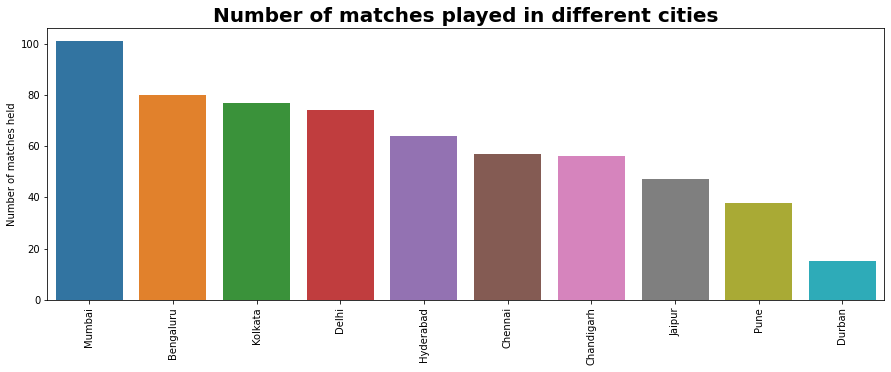

In [35]:
plt.figure(figsize = (15,5))
sns.barplot(x = match_city.index,y = match_city.values)
plt.title('Number of matches played in different cities',fontsize = 20,fontweight = 'bold')
plt.xticks(rotation = 90)
plt.ylabel('Number of matches held')
plt.show()

## Number of matches held in different venues

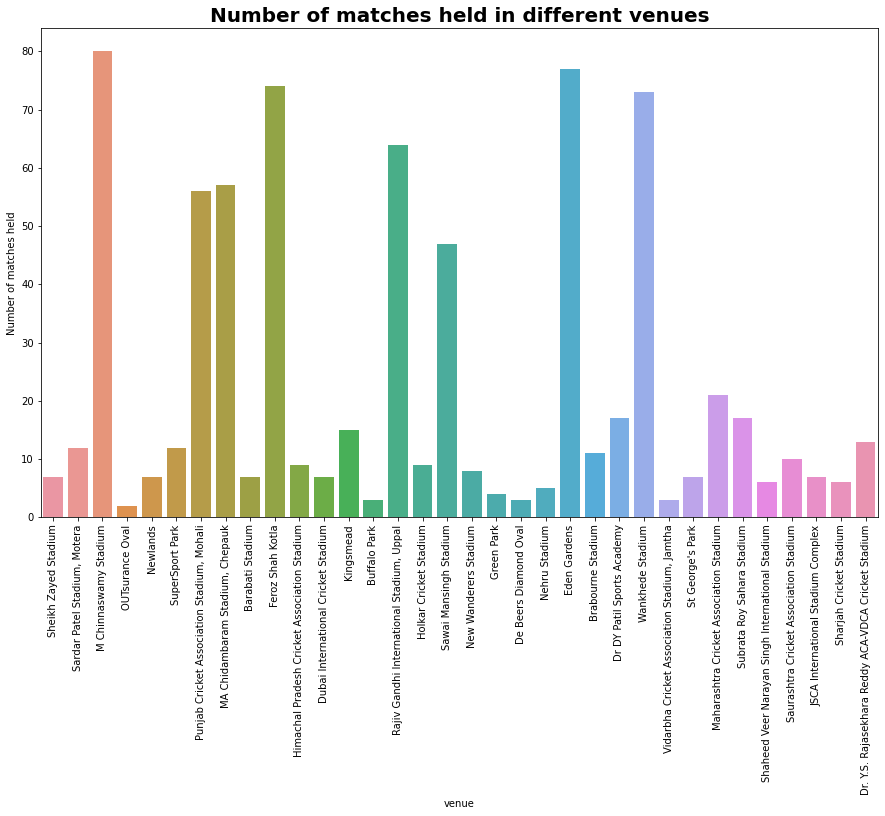

In [36]:
c1 = dfmatch.groupby(['city','venue']).count()['id'].reset_index()
plt.figure(figsize = (15,9))
sns.barplot(x = 'venue',y = 'id',data = c1)
plt.title('Number of matches held in different venues',fontsize = 20,fontweight = 'bold')
plt.xticks(rotation = 90)
plt.ylabel('Number of matches held')
plt.show()

## Number of teams participated in different seasons

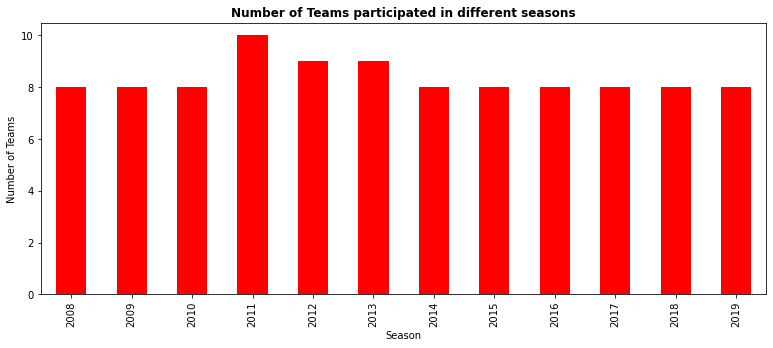

In [51]:
dfmatch.groupby('season')['team1'].nunique().plot(kind = 'bar',color = 'red', figsize=(13,5))
plt.title('Number of Teams participated in different seasons',fontweight='bold')
plt.xlabel('Season')
plt.ylabel('Number of Teams')
plt.show()

## Finding out the winner of each IPL season

In [38]:
season_winner = dfmatch[['season','winner']]

In [39]:
winnersList = {}
for i in sorted(season_winner['season'].unique()):
    winnersList[i] = season_winner[season_winner['season']==i]['winner'].tail(1).values[0]

IPL_winners = pd.DataFrame.from_dict(winnersList,orient = 'index',columns=['winner'])

In [40]:
IPL_winners

,winner
2008,Rajasthan Royals
2009,Deccan Chargers
2010,Chennai Super Kings
2011,Chennai Super Kings
2012,Kolkata Knight Riders
2013,Mumbai Indians
2014,Kolkata Knight Riders
2015,Mumbai Indians
2016,Sunrisers Hyderabad
2017,Mumbai Indians


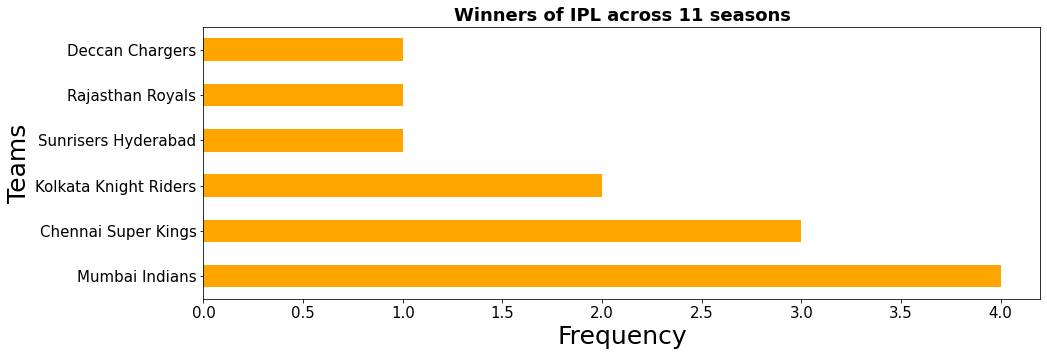

In [42]:
IPL_winners.winner.value_counts().plot(kind = 'barh', figsize = (15,5), color = 'orange')
plt.title("Winners of IPL across 11 seasons",fontsize=18,fontweight="bold")
plt.ylabel("Teams", size = 25)
plt.xlabel("Frequency", size = 25)
plt.xticks(size = 15)
plt.yticks(size = 15)
plt.show()

## Number of matches conducted across seasons

In [48]:
match_count = dfmatch.groupby('season').id.count().reset_index().rename(columns={'id':'count_of_matches'})

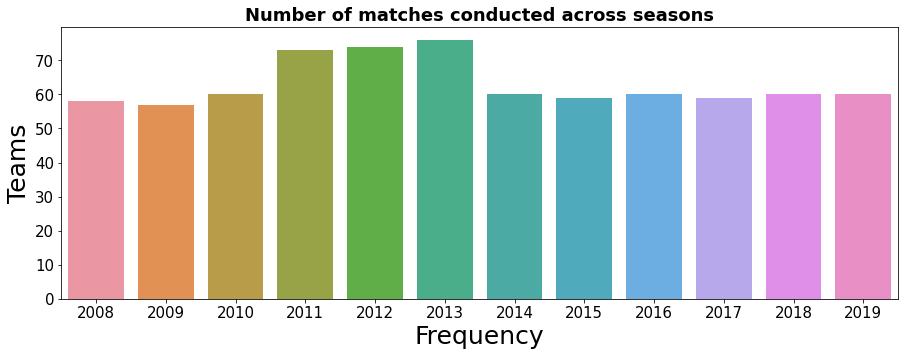

In [52]:
plt.figure(figsize = (15,5))
sns.barplot(x = 'season',y = 'count_of_matches',data = match_count)
plt.title('Number of matches conducted across seasons',fontsize=18,fontweight="bold")
plt.ylabel("Teams", size = 25)
plt.xlabel("Frequency", size = 25)
plt.xticks(size = 15)
plt.yticks(size = 15)
plt.show()

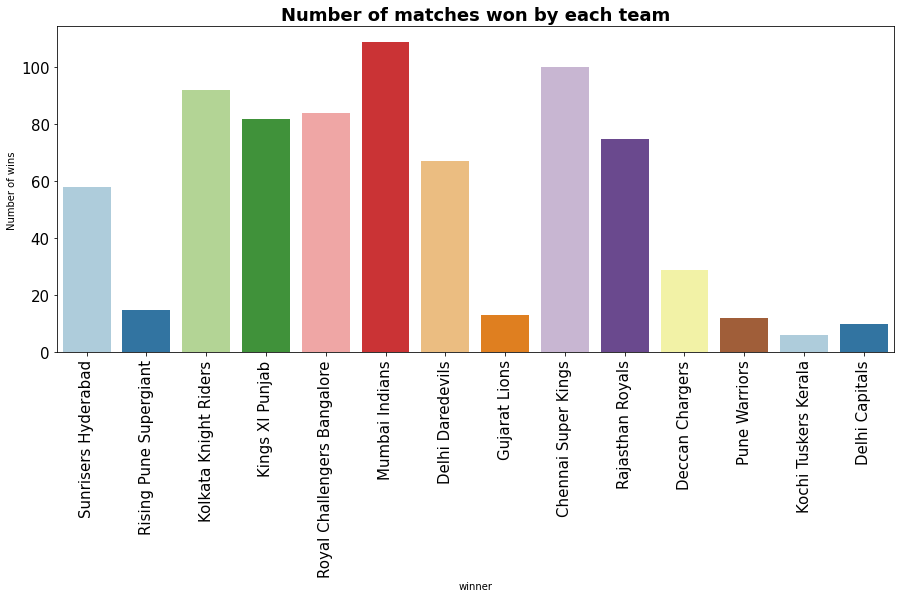

In [50]:
plt.figure(figsize = (15,6))
sns.countplot(x= 'winner',data = dfmatch,palette = 'Paired')
plt.title('Number of matches won by each team',fontsize = 18,fontweight = 'bold')
plt.xticks(rotation = 90)
plt.ylabel('Number of wins')
plt.xticks(size = 15)
plt.yticks(size = 15)
plt.show()

## Details of match won by maximum runs

In [53]:
dfmatch.iloc[dfmatch['win_by_runs'].idxmax()]

id                               44
season                         2017
city                          Delhi
date                     2017-05-06
team1                Mumbai Indians
team2              Delhi Daredevils
toss_winner        Delhi Daredevils
toss_decision                 field
result                       normal
dl_applied                        0
winner               Mumbai Indians
win_by_runs                     146
win_by_wickets                    0
player_of_match         LMP Simmons
venue              Feroz Shah Kotla
umpire1                 Nitin Menon
umpire2                   CK Nandan
Name: 43, dtype: object

## Deatils of match won by maximum wicket

In [54]:
win_wicket = dfmatch[dfmatch['win_by_wickets'] == 10]

In [55]:
win_wicket.shape

(11, 17)

## Match results w.r.t bowling/Batting first decision

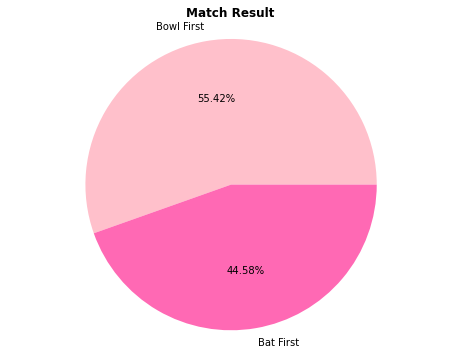

In [56]:
dfmatch['win_type'] = np.where(dfmatch['win_by_runs']>0,'Bat First','Bowl First')
win_type = dfmatch['win_type'].value_counts()
plt.figure(figsize = (8,6))
plt.pie(win_type,labels= win_type.index,colors = ['pink','hotpink'],radius = 1.6,autopct = "%0.2f%%")
plt.title('Match Result',fontweight = 'bold')
plt.axis('equal')
plt.show()

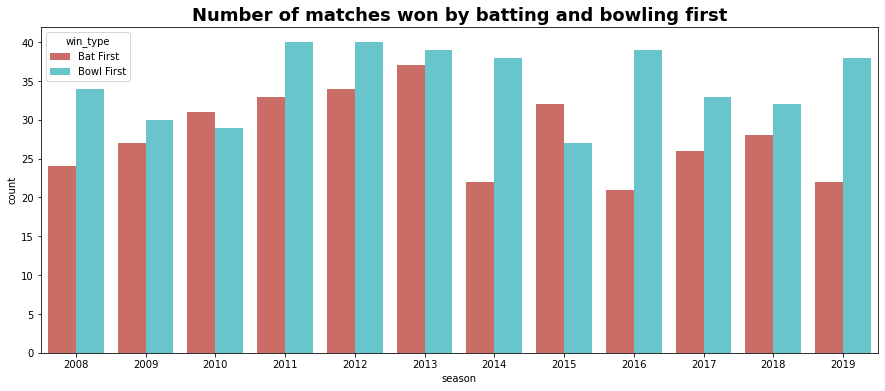

In [57]:
plt.figure(figsize = (15,6))
sns.countplot(x = 'season',hue = 'win_type',data = dfmatch,palette = 'hls')
plt.title('Number of matches won by batting and bowling first',fontsize = 18,fontweight = 'bold')
plt.show()

## Toss
#### Number of tosses won by each team

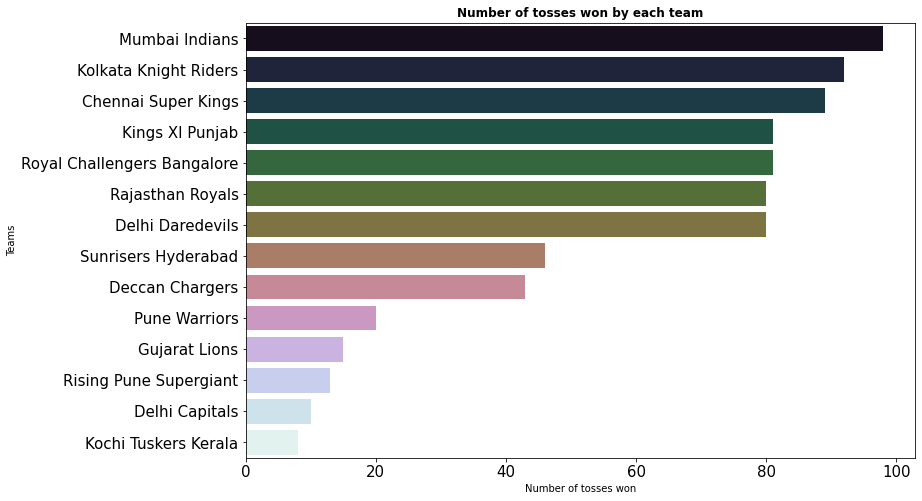

In [58]:
toss = dfmatch['toss_winner'].value_counts()
plt.figure(figsize = (12,8))
sns.barplot(y = toss.index,x = toss,palette = 'cubehelix')
plt.title('Number of tosses won by each team',fontweight = 'bold')
plt.xlabel('Number of tosses won')
plt.xticks(size = 15)
plt.yticks(size = 15)
plt.ylabel('Teams')
plt.show()

## Toss decisions in each season

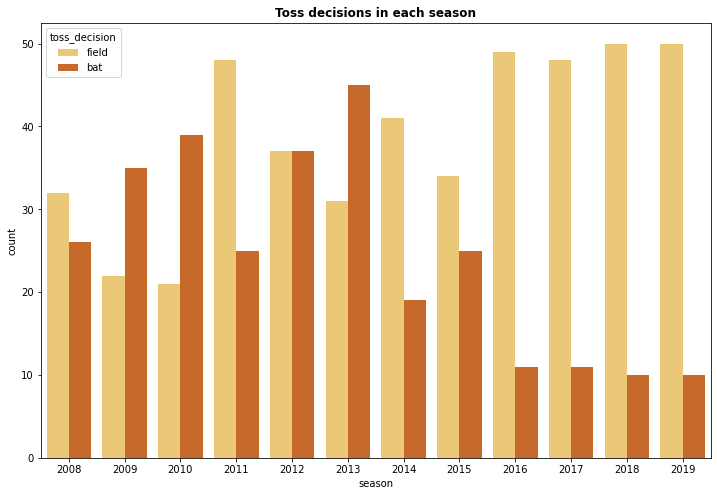

In [59]:
plt.figure(figsize = (12,8))
sns.countplot(x= 'season',hue = 'toss_decision',data = dfmatch,palette = 'YlOrBr')
plt.title('Toss decisions in each season',fontweight = 'bold')
plt.show()

## How many times a team has won after winning the match

In [60]:
np.sum(dfmatch['toss_winner']==dfmatch['winner'])

393

## 51.9 % the team who won the toss has also won the match
## Does teams chose to field or bat first, after winning the toss?

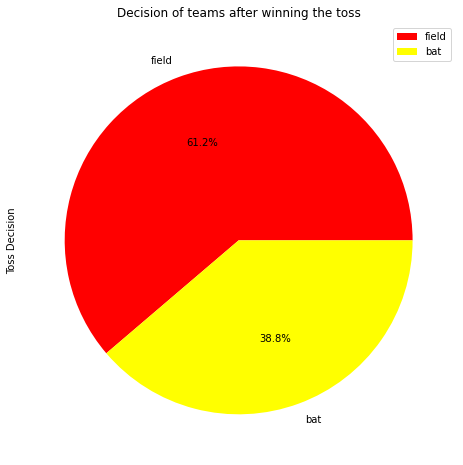

In [61]:
dfmatch['toss_decision'].value_counts().plot(kind = 'pie',figsize=(10,8),autopct = '%2.1f%%',legend=True,cmap = 'autumn')
plt.title('Decision of teams after winning the toss')
plt.ylabel('Toss Decision')
plt.show()

## Does the toss_decision has any impact on the winning chances?

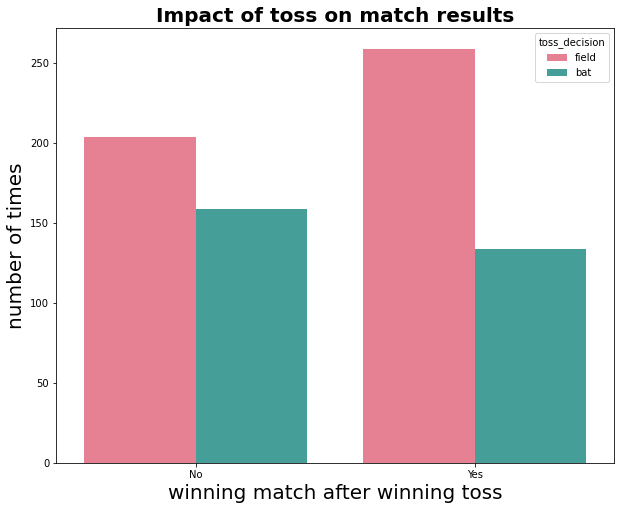

In [62]:
dfmatch['toss_match_win'] = np.where(dfmatch['toss_winner'] == dfmatch['winner'],'Yes','No')
plt.figure(figsize = (10,8))
sns.countplot(x = 'toss_match_win',hue = 'toss_decision',data = dfmatch,palette = 'husl')
plt.title('Impact of toss on match results',fontweight = 'bold',fontsize = 20)
plt.xlabel('winning match after winning toss',fontsize = 20)
plt.ylabel('number of times',fontsize = 20)
plt.show()

## Barplot of top 5 winning teams in when bats first

In [63]:
bat_first = dfmatch[dfmatch['win_by_runs']!=0]
bat_first['winner'].value_counts()[0:5]

Mumbai Indians                 57
Chennai Super Kings            52
Kings XI Punjab                38
Kolkata Knight Riders          36
Royal Challengers Bangalore    35
Name: winner, dtype: int64

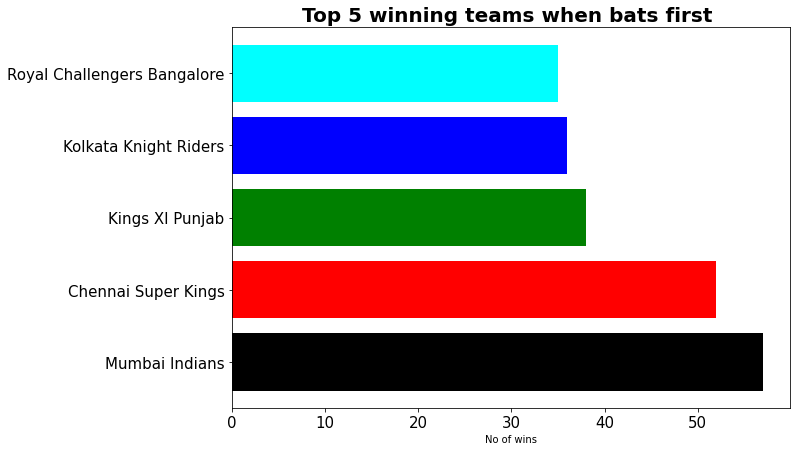

In [64]:
plt.figure(figsize = (10,7))
plt.barh(list(bat_first['winner'].value_counts()[0:5].keys()),list(bat_first['winner'].value_counts()[0:5]),color=['black', 'red', 'green', 'blue', 'cyan'])
plt.title('Top 5 winning teams when bats first ',fontweight = 'bold',fontsize = 20)
plt.xlabel('No of wins')
plt.xticks(size = 15)
plt.yticks(size = 15)
plt.show()

In [65]:
bat_second = dfmatch[dfmatch['win_by_wickets']!=0]

## Histogram of wickets

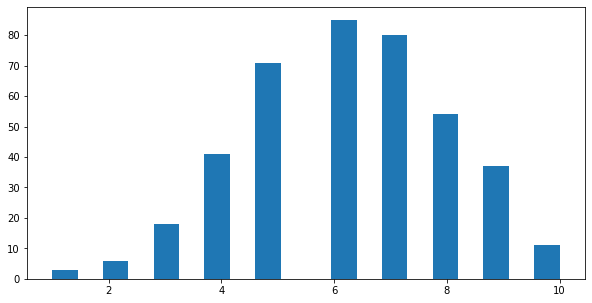

In [66]:
plt.figure(figsize = (10,5))
plt.hist(bat_second['win_by_wickets'],bins = 20)
plt.show()

## Top 5 wiinning teams when bowls first

In [67]:
bat_second['winner'].value_counts()[0:5]

Kolkata Knight Riders          56
Mumbai Indians                 50
Chennai Super Kings            48
Royal Challengers Bangalore    48
Rajasthan Royals               46
Name: winner, dtype: int64

## Ploting barplot of top 5 winning teams when bowl first

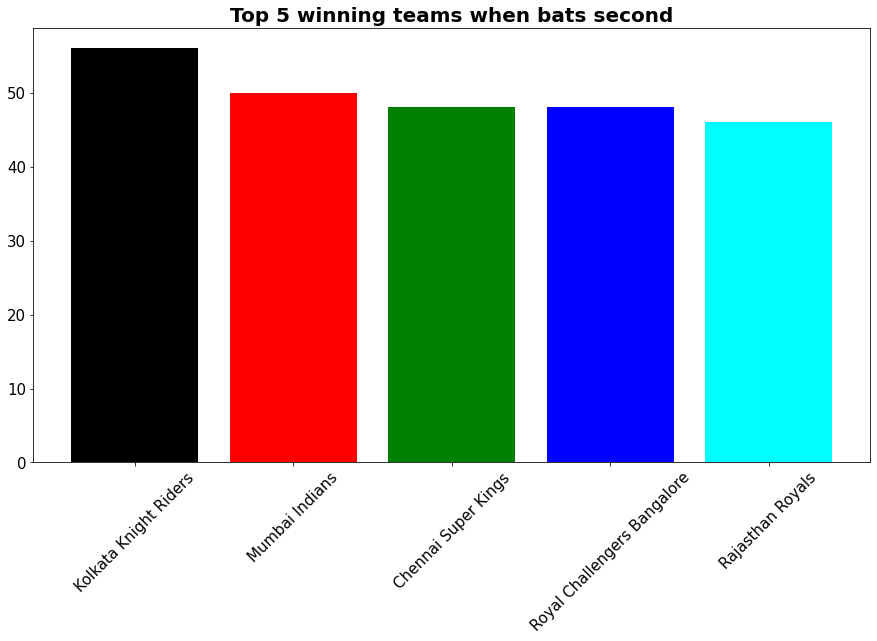

In [68]:
plt.figure(figsize = (15,8))
plt.bar(list(bat_second['winner'].value_counts()[0:5].keys()),list(bat_second['winner'].value_counts()[0:5]),color=['black', 'red', 'green', 'blue', 'cyan'])
plt.title('Top 5 winning teams when bats second',fontweight = 'bold',fontsize = 20)
plt.xticks(rotation = 45,size = 15)
plt.yticks(size = 15)
plt.show()

## Batting
### Finding the Distribution of runs in Batting First cases

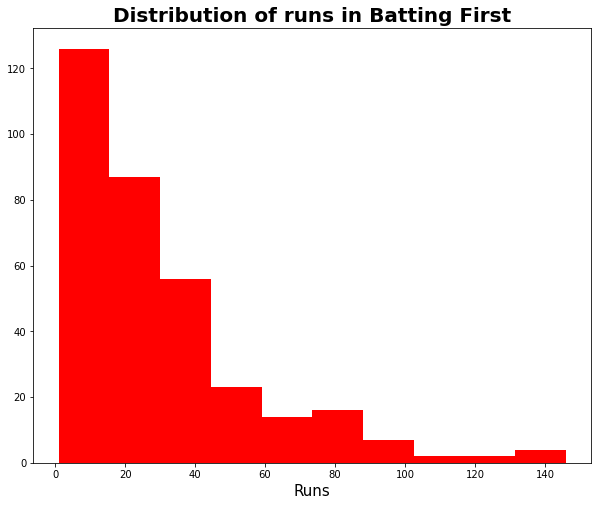

In [69]:
plt.figure(figsize = (10,8))
plt.hist(list(dfmatch[dfmatch['win_by_runs'] != 0]['win_by_runs']),color = 'red')
plt.title('Distribution of runs in Batting First',fontweight = 'bold',fontsize = 20)
plt.xlabel('Runs',fontsize = 15)
plt.show()

## Top 10 Players

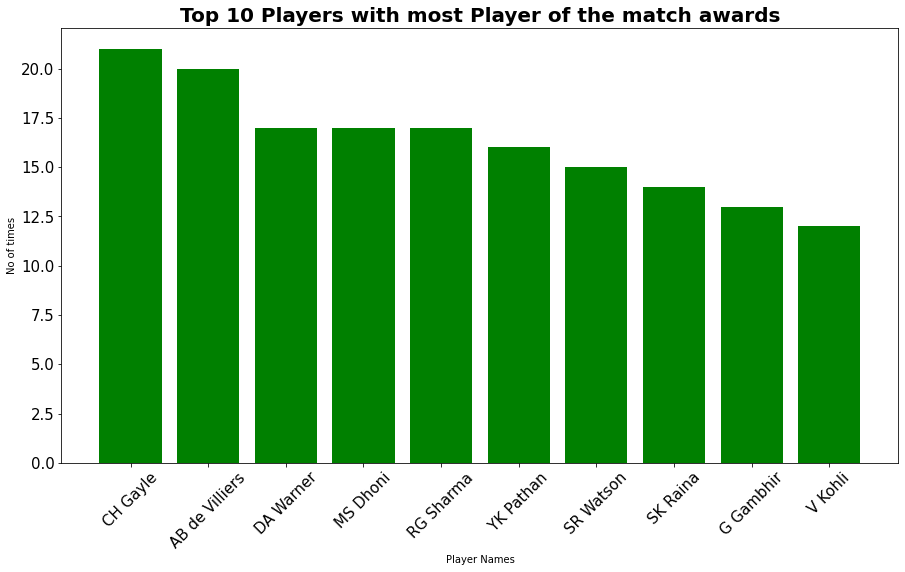

In [70]:
plt.figure(figsize = (15,8))
plt.bar(list(dfmatch['player_of_match'].value_counts()[0:10].keys()),list(dfmatch['player_of_match'].value_counts()[0:10]),color = 'green')
plt.xlabel('Player Names')
plt.ylabel('No of times')
plt.title('Top 10 Players with most Player of the match awards',fontweight = 'bold',fontsize = 20)
plt.xticks(rotation = 45,size = 15)
plt.yticks(size = 15)
plt.show()

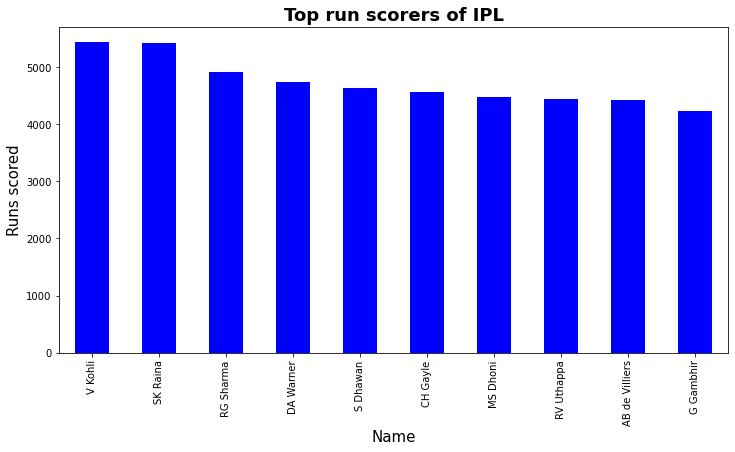

In [71]:
dfdeliv.groupby(['batsman'])['batsman_runs'].agg(sum).sort_values(ascending = False).head(10).plot(kind = 'bar',color = 'blue',figsize = (12,6))
plt.title('Top run scorers of IPL',fontsize = 18,fontweight = 'bold')
plt.xlabel('Name',size = 15)
plt.ylabel('Runs scored',size = 15)
plt.show()

## Number of six hit by players

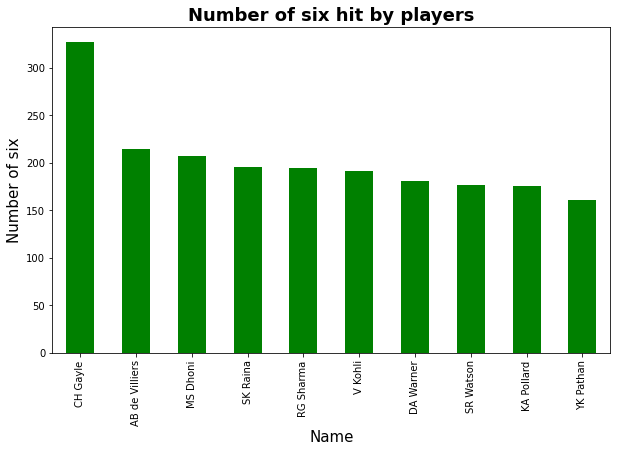

In [72]:
six_hits = dfdeliv[dfdeliv.batsman_runs == 6]

six_hits.groupby('batsman')['batsman_runs'].count().sort_values(ascending = False).head(10).plot(kind = 'bar',color = 'green',figsize = (10,6))
plt.title('Number of six hit by players',fontsize = 18,fontweight = 'bold')
plt.xlabel('Name',size = 15)
plt.ylabel('Number of six',size = 15)
plt.show()

## Different kind of dismissals in IPL

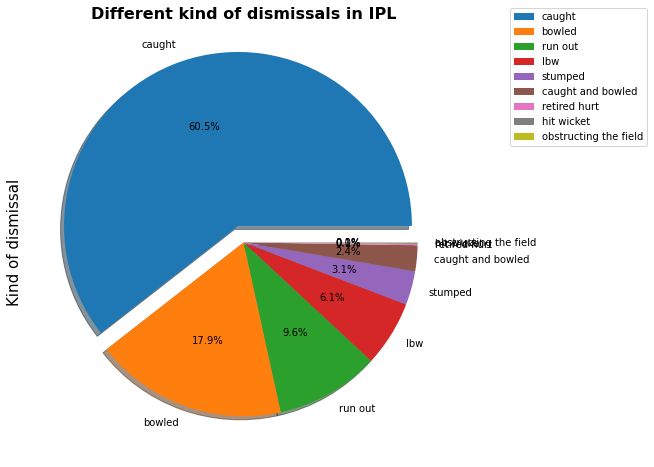

In [73]:
explode = (0.1, 0, 0, 0,0,0,0,0,0) 
dfdeliv.dismissal_kind.value_counts().plot(kind = 'pie',figsize=(10,8),explode = explode,autopct = '%2.1f%%',legend=True,shadow = True)
plt.legend(bbox_to_anchor=(1.1, 1.05))
plt.title('Different kind of dismissals in IPL',fontsize = 16,fontweight = 'bold')
plt.ylabel('Kind of dismissal',size = 15)
plt.show()

## Top wicket taking bowlers

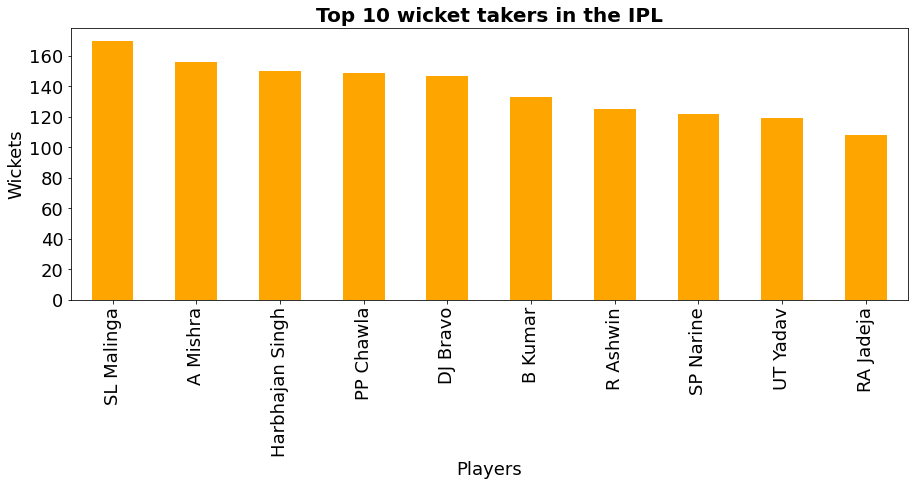

In [74]:
dfdeliv['wicket_credit_bowler'] = np.where((dfdeliv['dismissal_kind'] == 'caught') | (dfdeliv['dismissal_kind'] == 'bowled') | (dfdeliv['dismissal_kind'] == 'lbw') | (dfdeliv['dismissal_kind'] == 'stumped') | (dfdeliv['dismissal_kind'] == 'caught and bowled') | (dfdeliv['dismissal_kind'] == 'hit wicket'),'Yes','No')
dfdeliv_bowler = dfdeliv[dfdeliv['wicket_credit_bowler'] == 'Yes']
dfdeliv_bowler.groupby('bowler')['wicket_credit_bowler'].count().sort_values(ascending = False).head(10).plot(kind = 'bar',figsize=(15,5),color = 'orange')
plt.title("Top 10 wicket takers in the IPL", fontsize = 20,fontweight="bold")
plt.xticks(size = 18)
plt.yticks(size = 18)
plt.xlabel("Players",size = 18)
plt.ylabel("Wickets",size = 18)
plt.show()

## S L Malinga has taken the most number of wickets in IPL followed by A Mishra and Harbhajan Singh
## Top 5 bowlers who has given highest number of runs

In [43]:
dfdeliv.groupby(['bowler'])['total_runs'].agg(sum).sort_values(ascending = False).head(10)

bowler
PP Chawla          4153
Harbhajan Singh    4050
A Mishra           3850
DJ Bravo           3733
UT Yadav           3640
SL Malinga         3511
R Ashwin           3391
P Kumar            3342
B Kumar            3264
RA Jadeja          3221
Name: total_runs, dtype: int64

## Team wise bowling performance of bowler 'P P Chawla'

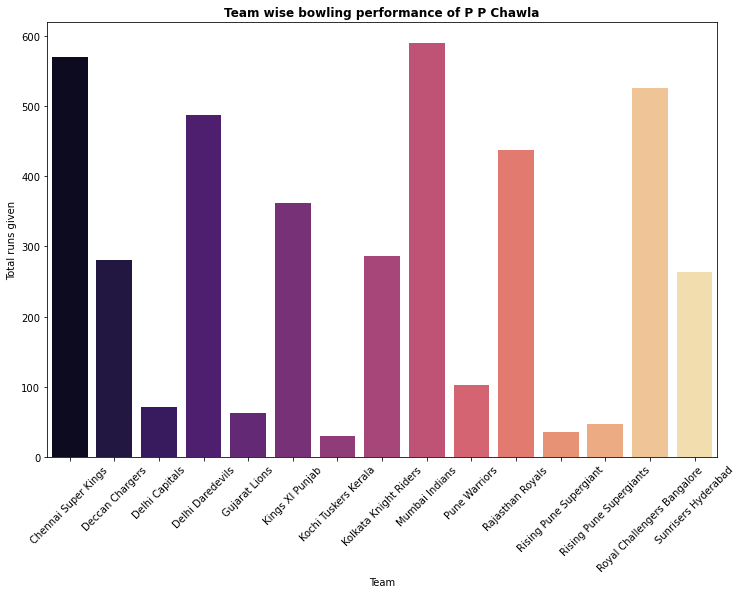

In [44]:
team_wise = dfdeliv[dfdeliv['bowler'] == 'PP Chawla'].groupby('batting_team')['total_runs'].sum()
plt.figure(figsize = (12,8))
sns.barplot(x =team_wise.index ,y =team_wise,palette = 'magma' )
plt.xticks(rotation = 45)
plt.title('Team wise bowling performance of P P Chawla',fontweight = 'bold')
plt.xlabel('Team')
plt.ylabel('Total runs given')
plt.show()

## Bowlers who have bowled maximum extras

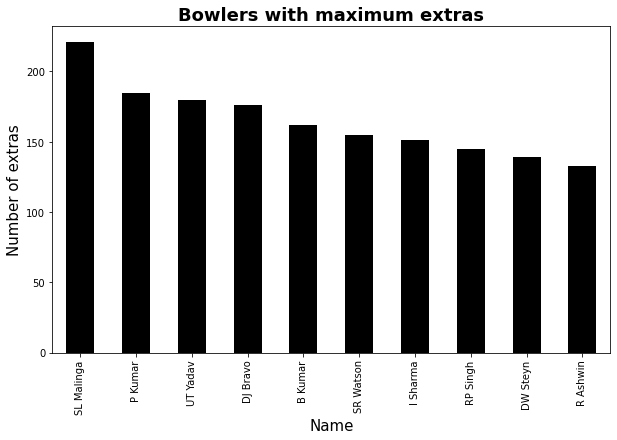

In [45]:
dfdeliv[dfdeliv['extra_runs'] != 0]['bowler'].value_counts()[:10].plot(kind = 'bar',color = 'black',figsize = (10,6))
plt.title('Bowlers with maximum extras',fontsize = 18,fontweight = 'bold')
plt.xlabel('Name',size = 15)
plt.ylabel('Number of extras',size = 15)
plt.show()

### Role of venues on deciding the winning team

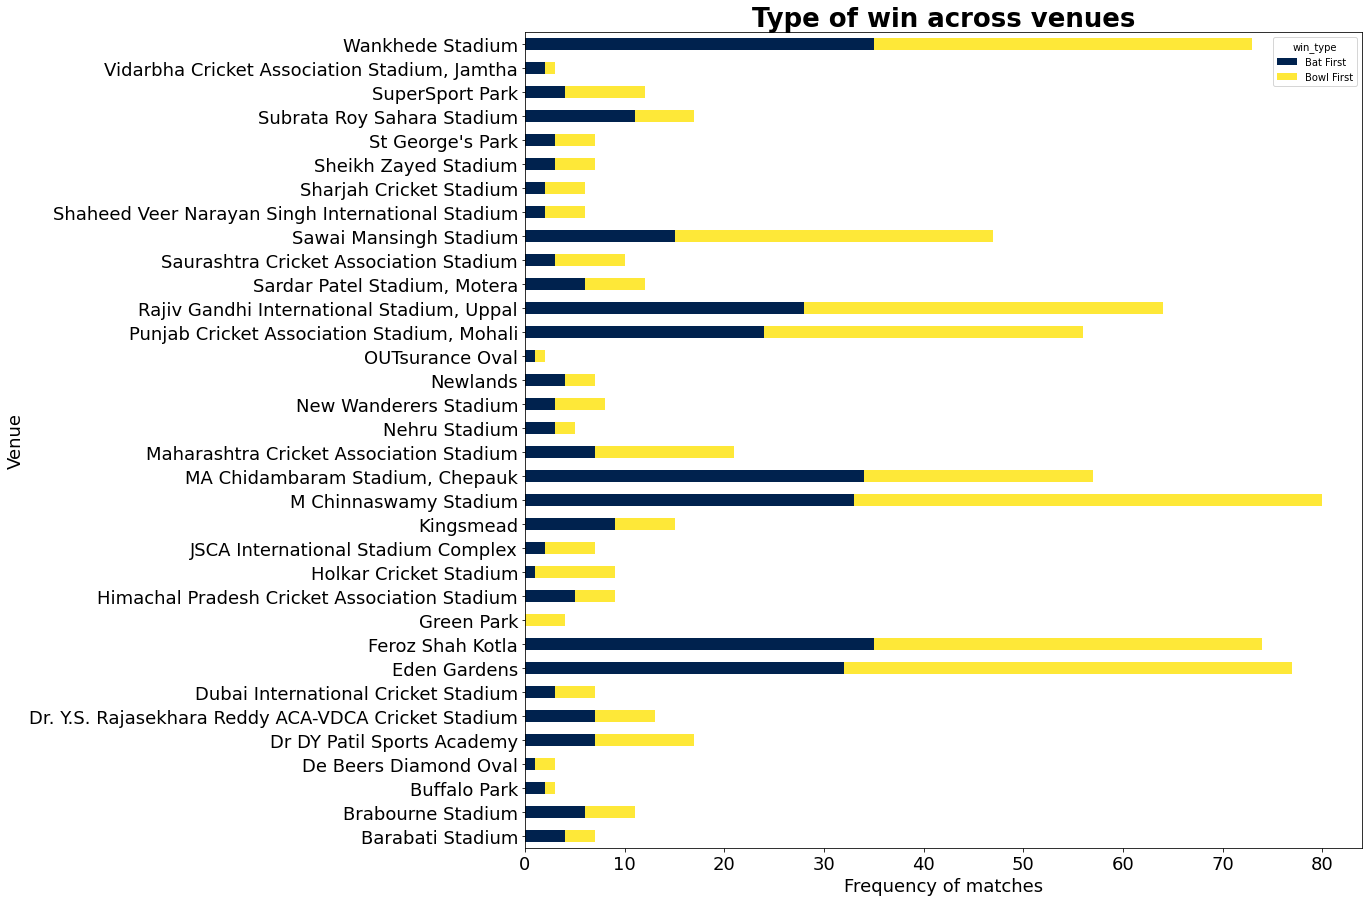

In [75]:
dfmatch.groupby('venue')['win_type'].value_counts().unstack().plot(kind = 'barh',stacked = True,figsize=(15,15),cmap = 'cividis')
plt.title("Type of win across venues", fontsize = 26,fontweight="bold")
plt.xticks(size = 18)
plt.yticks(size = 18)
plt.xlabel("Frequency of matches",size = 18)
plt.ylabel("Venue",size = 18)
plt.show()

## Bowling First has proven more advantageous in most of the venues

### Merging the two dataframes

In [76]:
merged = dfmatch[['id','season']].merge(dfdeliv, left_on='id', right_on='match_id', suffixes=(False, False)).drop(columns = 'match_id')

## Plotting total runs in each season

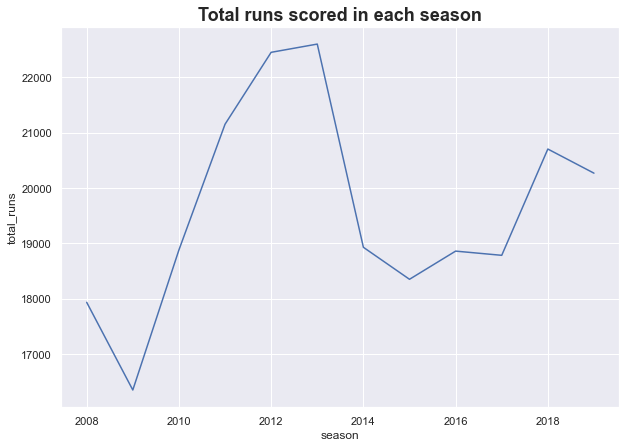

In [77]:
runs_Per_season = merged.groupby(['season'])['total_runs'].sum().reset_index()
plt.figure(figsize = (10,7))
sns.set_theme(style="darkgrid")
sns.lineplot(data = runs_Per_season,x='season',y='total_runs')
plt.title('Total runs scored in each season',fontsize = 18,fontweight = 'bold')
plt.show()

## Minimum number of scores were scored in 2009 season where maximum number of scores were scored in the year of 2013

### Average runs per season

In [78]:
season_matches = runs_Per_season.merge(match_count,on = 'season')
season_matches['Average runs per season'] = season_matches['total_runs']/season_matches['count_of_matches']
season_matches

,season,total_runs,count_of_matches,Average runs per season
0,2008,17937,58,309.258621
1,2009,16353,57,286.894737
2,2010,18883,60,314.716667
3,2011,21154,73,289.780822
4,2012,22453,74,303.418919
5,2013,22602,76,297.394737
6,2014,18931,60,315.516667
7,2015,18353,59,311.067797
8,2016,18862,60,314.366667
9,2017,18786,59,318.406780


## strike rate of batsman over the years

In [79]:
No_of_ball = pd.DataFrame(merged.groupby('batsman')['ball'].count())
runs = pd.DataFrame(merged.groupby('batsman')['batsman_runs'].sum())
No_of_season = pd.DataFrame(merged.groupby('batsman')['season'].nunique())

strike_rate = pd.DataFrame({'ball' : No_of_ball['ball'],'runs' : runs['batsman_runs'],'season' : No_of_season['season']}).reset_index()
strike_rate['batsman_strike_rate'] = strike_rate['runs']/strike_rate['ball']* 100

high_strike_rates = strike_rate[strike_rate['season'].isin([10,11])].drop(columns = ['ball','runs']).sort_values(by = 'batsman_strike_rate',ascending = False).head(10)

In [80]:
high_strike_rates

,batsman,season,batsman_strike_rate
92,CH Gayle,11,145.640370
213,KA Pollard,10,141.751527
112,DA Warner,10,139.523249
444,SR Watson,11,136.945813
72,BB McCullum,11,127.332746
449,STR Binny,10,126.000000
118,DJ Bravo,11,125.565801
514,Yuvraj Singh,11,125.283190
53,AT Rayudu,10,124.058187
147,G Gambhir,11,119.835414


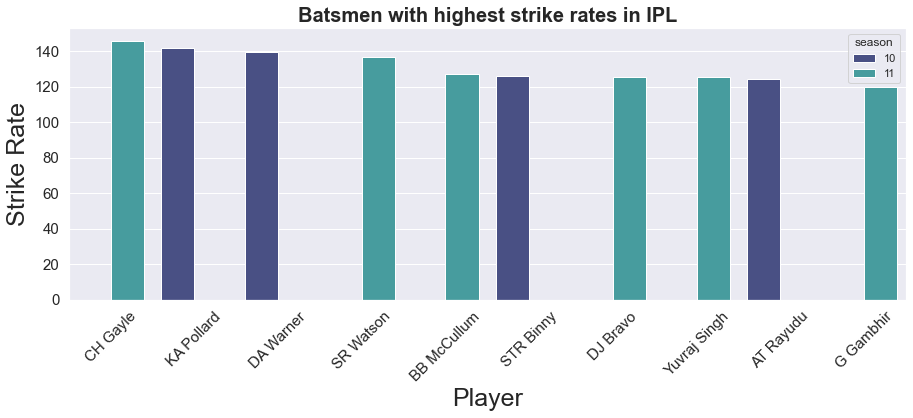

In [81]:
plt.figure(figsize = (15,5))
sns.barplot(x='batsman', y='batsman_strike_rate', data = high_strike_rates, hue = 'season',palette = 'mako')
plt.title("Batsmen with highest strike rates in IPL",fontsize= 20, fontweight = 'bold')
plt.xlabel("Player", size = 25)
plt.ylabel("Strike Rate", size = 25)
plt.xticks(size = 15,rotation = 45)
plt.yticks(size = 15)
plt.show()

### `CH Gayle and KA Pollard have the highest strike rates in IPL`

# Conclusion
    Q1. As a sports analysts, The most successful teams, players & factors contributing win or loss of a team:
    IPL Season 2011,2012,2013 had more number of matches played.

    Mumbai Indians is the most successful team in IPL as they have won more number of matches as well as toss.

    When defending a total, the biggest victory was by 146 runs(Mumbai Indians defeated Delhi Daredevils by 146 runs on 06 May 2017 at Feroz Shah Kotla stadium, Delhi).

    When chasing a target, the biggest victory was by 10 wickets ie. without losing any wickets and there were 11 such matches.

    Mumbai city has hosted the most number of IPL matches.

    The team winning the toss has 51% chance of winning the match.

    The team winning toss choose to field first as it has higher chances of winning.

    Bowling First has proven more advantageous in most of the venues.

    Chinnaswamy stadium has hosted most number of IPL matches in thr history of IPL.

    Only Mumbai and Pune has more than one venues, others have only one.

    IPL season 2013 witnessed most runs made.

    Virat Kohli and SK Raina are the top run scoring batsmen in IPL.

    SL Malinga is the top wicket taking bowler.
    
    CH Gayle has most number of sixes.

    CH Gayle,KA Pollard, DA Warner,SR Watson and BB McCullum have good strike rates compared to other batsmen.

    Q2. Teams or Players a company should endorse for its products.
    From the Data,it can be concluded that Team Mumbai Indians have won most number of IPL matches ,hence the team is preferable for endorsement of products by the companies.

    In Case of Individual performances of players, Chris Gayle has most number of MoM awards, V Kolhli & SK Raina with most number of runs scored, SL Malinga taking most number of wickets and other consistent players like KA Pollard, DA Warner,SR Watson should be endorsed by a company for its products.

# THANK YOU :)